In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [2]:
from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('/Users/Ruby/Desktop/TBrain.csv')
df.head()

,device_dev_name,device_family_name,device_hashed_mac,device_os_name,device_type_name,device_vendor_name,event_protocol_id,event_flow_outbound_or_inbound,event_role_device_or_router,event_role_server_or_client,event_rule_category,event_rule_id,event_rule_name,event_rule_reference,event_rule_severity,event_self_ipv4,event_time,router_ip
0,Windows,Computer,c589f89e814a5fda2c5ff061b0e9b283db057b1b,Windows,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,Access Control,1050015,WEB Cross-site Scripting -34,CVE-2011-2133; CVE-2014-4116,4,192.168.2.243,12/21/2016 3:01:29 AM,207.124.221.172
1,Windows,Computer,c589f89e814a5fda2c5ff061b0e9b283db057b1b,Windows,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,Access Control,1050015,WEB Cross-site Scripting -34,CVE-2011-2133; CVE-2014-4116,4,192.168.2.243,12/21/2016 3:01:29 AM,207.124.221.172
2,Windows,Computer,c589f89e814a5fda2c5ff061b0e9b283db057b1b,Windows,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,Access Control,1050015,WEB Cross-site Scripting -34,CVE-2011-2133; CVE-2014-4116,4,192.168.2.243,12/21/2016 3:01:29 AM,207.124.221.172
3,NaN,NaN,2d896d888f3b998e911ee97802daab0dd923e7aa,NaN,NaN,NaN,6,outbound,device,server,Web Attack,1050700,WEB Cross-site Scripting (document.cookie) att...,CVE-2012-0007; CVE-2012-0010; CVE-2012-1861; C...,5,200.223.65.226,12/12/2016 7:05:00 AM,201.97.175.59
4,NaN,NaN,2d896d888f3b998e911ee97802daab0dd923e7aa,NaN,NaN,NaN,6,outbound,device,server,Web Attack,1050700,WEB Cross-site Scripting (document.cookie) att...,CVE-2012-0007; CVE-2012-0010; CVE-2012-1861; C...,5,15.58.51.255,12/12/2016 7:52:24 AM,201.97.175.59


In [9]:
df=df.dropna()

In [10]:
df.isnull().sum()

device_dev_name                   0
device_family_name                0
device_hashed_mac                 0
device_os_name                    0
device_type_name                  0
device_vendor_name                0
event_protocol_id                 0
event_flow_outbound_or_inbound    0
event_role_device_or_router       0
event_role_server_or_client       0
event_rule_category               0
event_rule_id                     0
event_rule_name                   0
event_rule_reference              0
event_rule_severity               0
event_self_ipv4                   0
event_time                        0
router_ip                         0
dtype: int64

In [11]:
df=df.apply(label.fit_transform)

In [70]:
y=df.loc[:,['event_rule_name']]

In [71]:
x=df.drop(['event_rule_name'],axis=1)

In [14]:
x1= x.values.astype(np.float32) # 轉換數據類型
y1=y.values.astype(np.float32)   # or int32 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [17]:
lass=Lasso(alpha=1)

In [18]:
lass.fit(x_train,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
lass.coef_

array([ 0.00000000e+00, -0.00000000e+00,  4.05946980e-05,  7.11691425e-02,
       -9.07250636e-01, -8.25118210e-01, -1.76206901e+01, -1.23861994e+01,
        0.00000000e+00,  2.03658710e+01,  7.19884034e-01, -1.93806665e-01,
        2.10265273e-01,  3.33298105e+01, -7.02843260e-04, -3.81707857e-06,
       -3.95828360e-05])

In [20]:
#plt.scatter(x, y, marker='x')
#plt.plot(x, predicted,c='r')

In [21]:
coef = pd.Series(lass.coef_, index = x_train.columns)

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

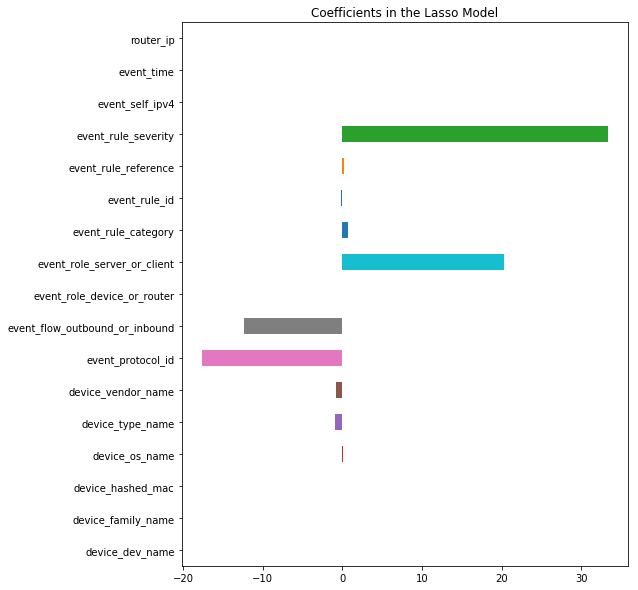

In [22]:
plt.rcParams['figure.figsize'] = (8.0, 10.0)
coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")   #此圖可以看出特徵的重要程度，藉此刪除不重要的特徵

In [ ]:
#---------finifsh feature selsction 

In [23]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4,random_state=0)#最大深度限制：4

In [24]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [25]:
tree.score(x_train,y_train) #no feature select

0.7897737604963363

In [27]:
df.columns

Index(['device_dev_name', 'device_family_name', 'device_hashed_mac',
       'device_os_name', 'device_type_name', 'device_vendor_name',
       'event_protocol_id', 'event_flow_outbound_or_inbound',
       'event_role_device_or_router', 'event_role_server_or_client',
       'event_rule_category', 'event_rule_id', 'event_rule_name',
       'event_rule_reference', 'event_rule_severity', 'event_self_ipv4',
       'event_time', 'router_ip'],
      dtype='object')

In [28]:
y.columns

Index(['event_rule_name'], dtype='object')

In [ ]:
#tree1=DecisionTreeClassifier(criterion='e')

In [72]:
x_after_selsct=df.drop(['event_rule_name','router_ip','event_time','event_self_ipv4','event_role_device_or_router','device_family_name', 'device_hashed_mac','device_dev_name'],axis=1)

In [48]:
X_test,X_train,Y_test,Y_train=train_test_split(x_after_selsct,y,test_size=0.3,random_state=0)

In [49]:
tree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [50]:
tree.score(X_train,Y_train)# 使用決策術預測結果，正確率為0.7

0.7897915886684138